In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import numpy.linalg as la

In [3]:
data = np.loadtxt('gravdata.txt')
x = data[:,0]*1e3 # x coordinate
d = data[:,1] # data
#define constants
G = const.G
l = 1e3 #thickness of a layer
unc = 1e-9 #uncertainty
#layers bottom top
zt = np.arange(0,100)*l
zb = np.arange(1,101)*l 
#Construct matrix for the linearized model
def Mat(x):
    Mat = np.empty((len(x),100))
    for k in range(len(x)):
        for i in range(100):
            Mat[k,i] = G*np.log((zb[i]**2+x[k]**2)/(zt[i]**2+x[k]**2))
    return Mat
#data = M@m
def forward(m,x): return Mat(x)@m
#returns model parameters
def solution(Mat,x,d,eps):
    A = Mat.T@Mat
    d = np.reshape(d, (len(d),1))
    return la.inv(A+eps**2*np.eye(len(A)))@Mat.T@d

In [4]:
def misfit(m,d,x): return la.norm(d-forward(m,x))**2-18*unc**2

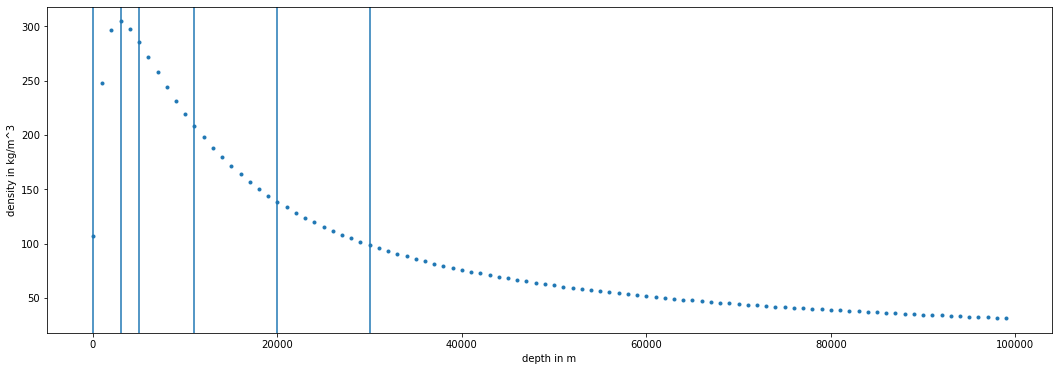

In [10]:
m = solution(Mat(x), x,d,eps = 1e-10)
fig, ax = plt.subplots(figsize = (18,6))
ax.set_xlabel('depth in m')
ax.set_ylabel('density in kg/m^3')
ax.axes.axvline(0)
ax.axes.axvline(3000)
ax.axes.axvline(5000)
ax.axes.axvline(11000)
ax.axes.axvline(20000)
ax.axes.axvline(30000)
ax.plot(zt,m, '.')

In [11]:
Mis = []
Eps = np.logspace(-15,-5,100)

In [12]:
for e in Eps:
    Mis.append(misfit(solution(Mat(x),x,d,e),d,x))

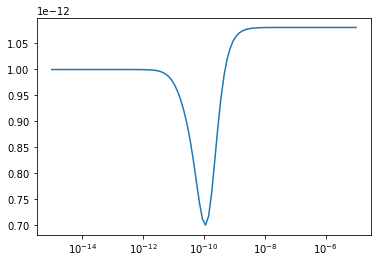

In [13]:
fig,ax = plt.subplots()
ax.plot(Eps, Mis)
ax.set_xscale('log')